

Choose an appropriate dataset of your choice such that every record (example) has at least 5 features which are numeric in nature and there is at least one attribute (feature) which is binary in nature. 

You can use the binary attribute as the binary target label to be predicted. 

Split your dataset into a training set and a test set. You can try different splits: 70:30 (70% training, 30% testing), 80:20 or 90:10 split. 

On the training set, train the following classifiers: 

1. Half Space
2. Logistic Regression (using inbuilt function)
3. SVM classifier (using a linear kernel)
4. SVM classifier (using a Polynomial kernel and a Gaussian kernel)
5. Logistic Regression using the SGD procedure. 

If your data is not linearly separable, then you will be required to use the soft SVM formulation. 
You can use the inbuilt implementation of logistic regression and SVM in SciKit Learn.

Compare and analyze the results obtained by using the different classifiers. For the soft SVM formulation, you should compare the performance with the different values of the regularization parameter. Report the number of support vectors obtained for every dataset split. 
You should submit a report along with the code. 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
df = pd.read_csv('bill_authentication.csv')
# https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [38]:
df.shape

(1372, 5)

In [39]:
df.head()
# variance_of_wavelet_transformed, used as input.
# skewness_of_wavelet_transformed, used as input.
# curtosis_of_wavelet_transformed, used as input.
# entropy_of_image, used as input.
# class, used as the target. It can only have two values: 0 (false) or 1 (true).

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [40]:

df.Class.value_counts()



0    762
1    610
Name: Class, dtype: int64

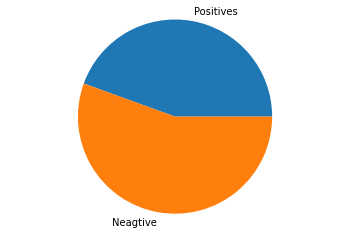

In [41]:
labels = 'Positives', 'Neagtive'
num_pos = 610
num_neg = 762
size=[num_pos,num_neg]
figure, plotpie = plt.subplots()
plotpie.pie(size, labels=labels)
plotpie.axis('equal')
plt.show()

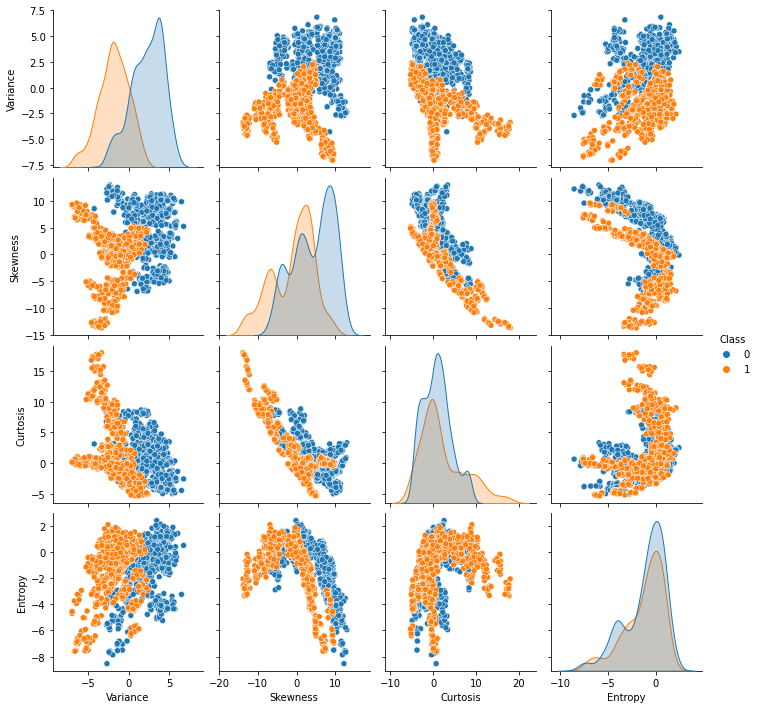

In [42]:
# Import seaborn
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
# Use pairplot and set the hue to be our class
sns.pairplot(df, hue='Class') 

# Show the plot
plt.show()

In [43]:
# defining features and target variable
y = df['Class']
X = df.drop(columns = ['Class'])
from sklearn.model_selection import train_test_split
#splitting the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [44]:
print(X_train.shape, X_test.shape)

(960, 4) (412, 4)


<Figure size 432x288 with 0 Axes>

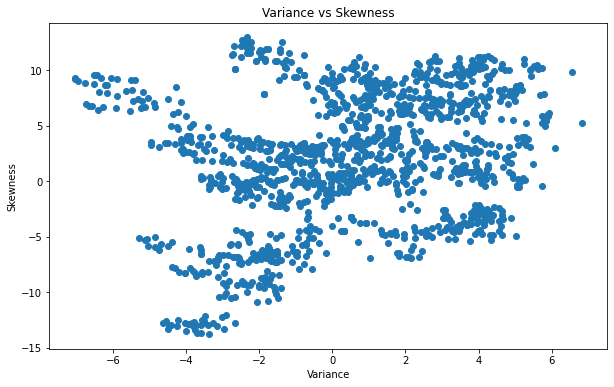

In [45]:
#HALFSPACE Seperablity test
plt.clf()
plt.figure(figsize=(10,6))
plt.scatter(df['Variance'], df['Skewness'])
plt.title('Variance vs Skewness')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.show()

[0]
[0]
[-0.7692889  -0.20865989]


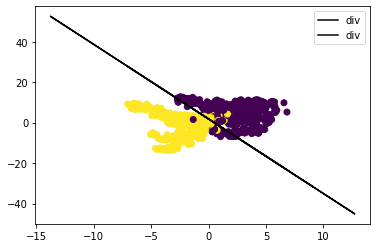

In [85]:
# X_train, y_train
new_x = X_train.Variance
new_y = X_train.Skewness

points_X = X_train[['Variance','Skewness']]
class_y = y_train
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(points_X,class_y)
print(clf.predict([[0.58,0.76]]))
print(clf.predict([[10.58,10.76]]))
# same way we can send our test set to predict all values
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = points_X
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="div")

plt.scatter(new_x,new_y, c = class_y)
plt.legend()
plt.show()

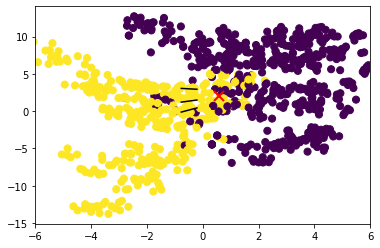

In [91]:

plt.scatter(new_x,new_y, c=class_y, s=50);
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(clf.coef_[0], m * clf.coef_[0] + b, '-k')
plt.xlim(-6, 6);


In [95]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
from sklearn.metrics import accuracy_score
y_pred=lr.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

0.9902912621359223

In [97]:
# SVM classifier (using a linear kernel)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
y_pred = svclassifier.predict(X_test)


In [99]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
SVM: Maximum margin separating hyperplane¶
print(classification_report(y_test,y_pred))

[[215   2]
 [  3 192]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       217
           1       0.99      0.98      0.99       195

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



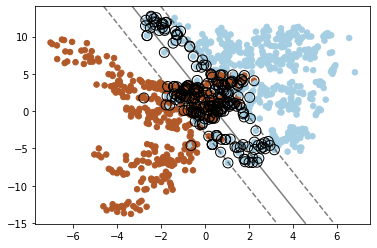

In [105]:
# SVM: Maximum margin separating hyperplane


import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


plt.scatter(new_x,new_y, c=class_y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
# Polynomial Kernel

from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[174  54]
 [  0 184]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.87       228
           1       0.77      1.00      0.87       184

    accuracy                           0.87       412
   macro avg       0.89      0.88      0.87       412
weighted avg       0.90      0.87      0.87       412



In [ ]:
new_x, new_y, class_y

In [ ]:
points_X, class_y

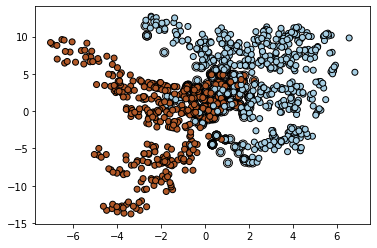

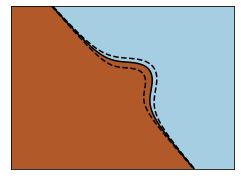

In [117]:
# Reference: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
clf = svm.SVC(kernel='poly', gamma=2)
clf.fit(points_X, class_y)
plt.clf()
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,facecolors='none', zorder=10, edgecolors='k')
# y_train, y_test
plt.scatter(new_x, new_y, c=class_y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
# X_test, y_test

plt.axis('tight')
x_min = -6
x_max = 6
y_min = -15
y_max = 15

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.figure(4, figsize=(4, 3))
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Gaussian Kernel

In [125]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [129]:
y_pred = svclassifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,

In [130]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[216   1]
 [  0 195]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       0.99      1.00      1.00       195

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [ ]:
# new_x, new_y, class_y, points_X, class_y